In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats:", self.catcount)
        print("Dogs:", self.dogcount)
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

PetImages/Cat


100%|████████████████████████████████████| 12501/12501 [00:15<00:00, 793.55it/s]


PetImages/Dog


100%|████████████████████████████████████| 12501/12501 [00:16<00:00, 755.57it/s]
/Users/derricklin/programming/pytorch/venv/lib/python3.9/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Cats: 12476
Dogs: 12470


In [4]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [5]:
print(len(training_data))

24946


In [7]:
print(training_data[1])

[array([[ 40,  50,  53, ..., 131, 127,  60],
        [ 40,  49,  48, ..., 131, 121,  57],
        [ 42,  46,  47, ..., 132, 122,  57],
        ...,
        [157, 157, 159, ..., 207, 216, 221],
        [160, 164, 163, ..., 218, 213, 219],
        [170, 175, 175, ..., 221, 219, 218]], dtype=uint8) array([0., 1.])]


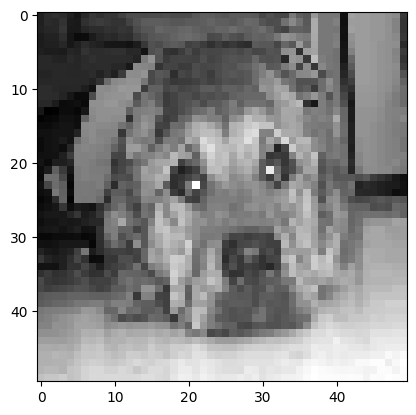

In [10]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap="gray")
plt.show()